In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [3]:
data_dir = "cell_images"
parasitized_dir = os.path.join(data_dir, "Parasitized")
uninfected_dir = os.path.join(data_dir, "Uninfected")

In [4]:
IMG_WIDTH, IMG_HEIGHT = 128, 128
BATCH_SIZE = 32
INPUT_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),    
    batch_size=32,
    class_mode='binary',       
    subset='training',          
    shuffle=True
)

Found 22048 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

In [7]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

Found 22048 images belonging to 2 classes.


In [8]:
validation_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 5510 images belonging to 2 classes.


In [18]:
def build_custom_cnn(input_shape):
    inputs = Input(shape=input_shape)

    x = Conv2D(32, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    x = Flatten()(x)
    x = Dense(512)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)
    
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model
model = build_custom_cnn(INPUT_SHAPE)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 8,782,017 (33.50 MB)

 Trainable params: 8,780,033 (33.49 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [22]:
model.compile(optimizer=Adam(learning_rate=5e-5), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=15, 
                               restore_best_weights=True,
                               verbose=1)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.2, 
                                 patience=7,  
                                 min_lr=1e-7, 
                                 verbose=1)

In [24]:
epochs = 50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE if train_generator.samples > 0 else 1,
    validation_steps=validation_generator.samples // BATCH_SIZE if validation_generator.samples > 0 else 1,
    callbacks=[early_stopping,lr_scheduler],
)

Epoch 1/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 182s 262ms/step - accuracy: 0.6874 - loss: 0.6265 - val_accuracy: 0.8390 - val_loss: 0.3725 - learning_rate: 5.0000e-05
Epoch 2/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 195s 282ms/step - accuracy: 0.8817 - loss: 0.3025 - val_accuracy: 0.6626 - val_loss: 0.5787 - learning_rate: 5.0000e-05
Epoch 3/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 208s 302ms/step - accuracy: 0.9093 - loss: 0.2503 - val_accuracy: 0.8701 - val_loss: 0.3788 - learning_rate: 5.0000e-05
Epoch 4/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 209s 303ms/step - accuracy: 0.9207 - loss: 0.2222 - val_accuracy: 0.9106 - val_loss: 0.2671 - learning_rate: 5.0000e-05
Epoch 5/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 206s 298ms/step - accuracy: 0.9233 - loss: 0.2133 - val_accuracy: 0.9348 - val_loss: 0.1787 - learning_rate: 5.0000e-05
Epoch 6/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 195s 283ms/step - accuracy: 0.9284 - loss: 0.2085 - val_accuracy: 0.9406 - val_loss: 0.1550 - learning_rate: 5.0000e-05
Epoch 7/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 

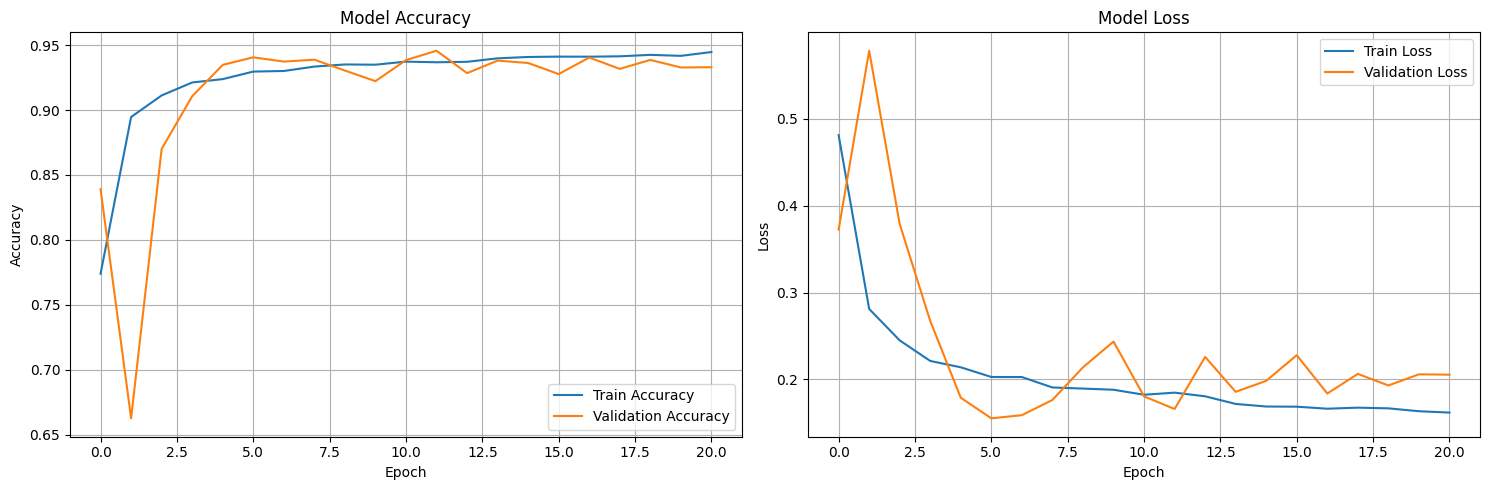

In [25]:
def plot_training_history(history_obj):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history_obj.history['accuracy'], label='Train Accuracy')
    ax1.plot(history_obj.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history_obj.history['loss'], label='Train Loss')
    ax2.plot(history_obj.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [26]:
model.save("custom_malaria_cnn_model.h5")